# Break even analysis

# Revenues

1. Acording to this [NSI 2021 Census analysis](https://www.nsi.bg/sites/default/files/files/pressreleases/Census2021-ethnos.pdf) the roma minority group in Bulgaria is 266 720, from which 14 % have secondary education and 41 % have primary education, respectively **37 341** and **109 355**.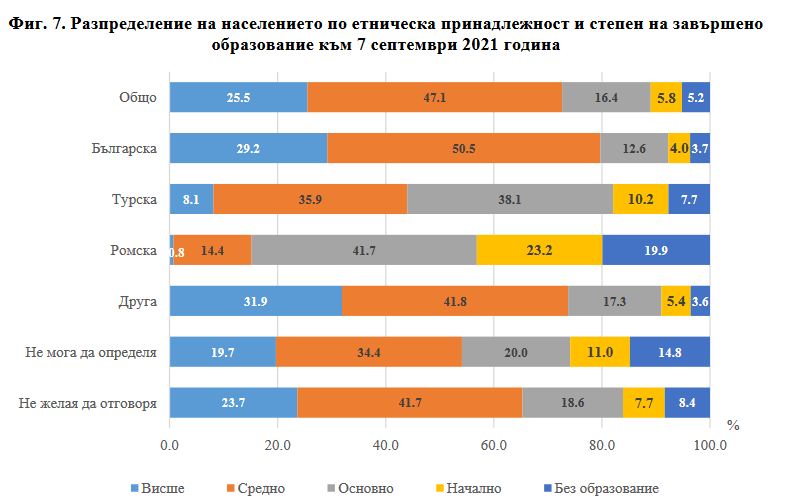

2. Acording to this [site for qualifications](https://zbut-academy.bg/obuchenie/kurs-zavarchik/) the trainees must obay the *Regulation for Conditions and Procedure for acquisition and recognition of welding competence*, which states that they must have passed **6-th** grade (**secondary edication**) and be **16 years old** or successfully completed a literacy course under the Employment Promotion Act (EPA). This site also gives us information of a course price: **600 leva**.
    
        -> The 90 % confidence interval for number of potential trainees becomes: [0, 140000]

3. This is too broad, we need to see how much market demand there is. In the most popular [bulgarian site for job searching](https://www.jobs.bg/front_job_search.php?subm=1&keywords%5B%5D=%D0%B7%D0%B0%D0%B2%D0%B0%D1%80%D1%87%D0%B8%D0%BA) there are **100 job offerings!**. Looking at the [National Employment Agency](https://www.az.government.bg/bg/ejobs/prl_list/) we see similar job listnings, we conclude that the interval becomes:

        -> The 90 % confidence interval for number of potential trainees becomes: [0, 100]

4. Let's look at pricing this course. From point 1. the price was **600 leva**. [Another site](https://www.davitoz.org/kursove-za-zavarchik/) gives us a price of 956 leva (if you pay the lump sum) or **1056 leva** (that can be split in two payments of 528) for individual training course and for a group training the price is, of course lower. The minimum price we could find is 300 leva, which seems too low, however we will use it as a lower boundary.

        -> The 90 % confidence interval for number of potential course price: [300, 1056]

5. Let's give some success rate intervals for students to finish our course. Acording to ["Massive open online course completion rates revisited: Assessment, length and attrition", by Katy Jordan](https://www.researchgate.net/publication/308391574_Massive_open_online_course_completion_rates_revisited_Assessment_length_and_attrition), we will use those results:

*"Completion rates (defined as the percentage of enrolled students who completed the course) vary from 0.7% to 52.1%, with a median value of 12.6%."*

        -> The 90 % confidence interval for number of potencial course price: [0.007, 0.52]

# Costs

1. We need to obtay [The licensing requirements for a professional training center have been adopted by the Management Board of the National Agency for Professional Education and Training (NAPOO) with Protocol No. 09 dated July 16, 2008, amended and supplemented by Protocol No. 02 dated May 19, 2021](https://www.navet.government.bg/bg/media/iziskvania-l-cpo-002.pdf), thus we need:
 - Material and technical base
 - Human resources - teaching staff and administration capacity
 - Access and availability of information for all parties involved
 - etc. 

2. In order to asses some cost we will use the Profit and Loss Statement(P&L) from one of the qualification firms we mentioned earlier, called ["Izoblock" LLC](https://zbut-academy.bg/obuchenie/kurs-zavarchik/), which is publicly available in the bulgarian [Commercial Register](https://portal.registryagency.bg/CR/Reports/ActiveConditionTabResult?uic=123745189). Their total equity and liabilities are around **100 000 leva**, however they are a much bigger firm that offers many different courses, so our lower boundry would be half that

        -> The 90 % confidence interval for total equity and liability: [50000, 100000]

# Monte Carlo simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(13)
num_scenarios = 10000

In [3]:
data = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(0, 100, size=num_scenarios),
                     'course_price': np.random.uniform(300, 1056, size=num_scenarios),
                     'course_completion': np.random.uniform(0.007, 0.52, size=num_scenarios),
                        'totalCosts': np.random.uniform(50000, 100000, size=num_scenarios)})

In [4]:
# Creating a revenue column by multipling course price and trainees
data['total_revenue'] = data['trainees'] * data['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
data['NetIncome'] = data['total_revenue'] - data['totalCosts']
# Creating a column that shows how much new workforce we have created
data['Workforce'] = data['trainees'] * data['course_completion']
# Creating a column that counts if net income is above 0, break even point
data['Yes/No'] = np.where(data['NetIncome'] >= 0, 'Yes', 'No')

In [5]:
print(data)

      scenario   trainees  course_price  course_completion    totalCosts  \
0            1  77.770241    535.815481           0.190651  59056.403920   
1            2  23.754122    570.180636           0.133342  85167.978603   
2            3  82.427853    389.961141           0.420198  85534.805682   
3            4  96.574920    469.833324           0.190086  80627.367724   
4            5  97.260111    454.935607           0.178124  77058.802179   
...        ...        ...           ...                ...           ...   
9995      9996  79.667220    974.041151           0.079007  50721.968118   
9996      9997  57.350330    342.148839           0.053958  69518.134671   
9997      9998  13.252624    889.397626           0.114160  80077.287040   
9998      9999  79.817773    996.707784           0.067250  72773.393399   
9999     10000  29.906977    581.531006           0.393236  50646.529959   

      total_revenue     NetIncome  Workforce Yes/No  
0      41670.499104 -17385.904816

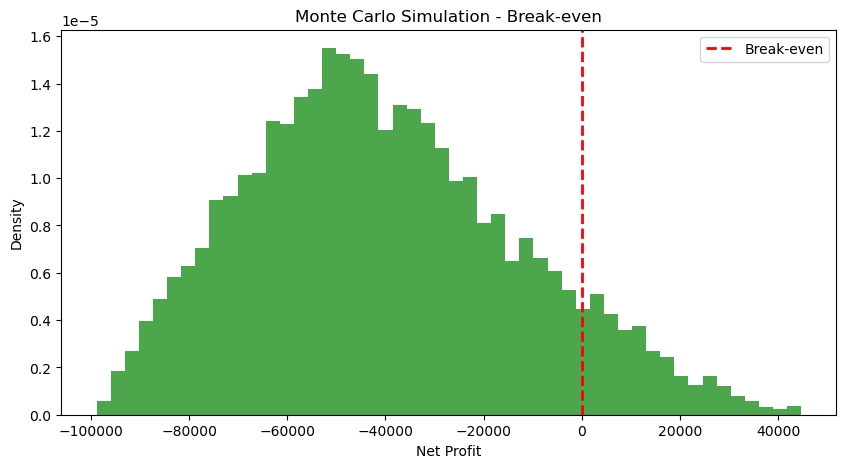

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(data['NetIncome'], bins=50, density=True, color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [7]:
result_table = pd.crosstab(index=data['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       9067
Yes       933


In [8]:
column_summary = data['Workforce'].describe()
print(column_summary)

count    10000.000000
mean        13.266423
std         11.445051
min          0.000068
25%          3.732302
50%         10.038915
75%         20.213423
max         51.200983
Name: Workforce, dtype: float64
